In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

from matplotlib.ticker import FuncFormatter

In [2]:
labelsize = 15

In [3]:
def scientific_tex_formatter(x, pos):
    if x == 0.:
        return r'$0$'
    
    str_ = "%.1e" % x
    
    #str_ = str_.replace('1.0', '')
    str_ = str_.replace('e-', '\,\,10^{-')
    str_ = str_.replace('e+', '\,\,10^{')
    
    if str_[-2] == '0':
        str_ = str_[:-2] + str_[(-1):]
    
    str_ = str_ + '}'
    str_ = r'$%s$' % str_
    
    return str_

f_scientific_tex_formatter = FuncFormatter(scientific_tex_formatter)

def scientific_tex_formatter2(x, pos):
    if x == 1.:
        return r'$1$'
    
    str_ = "%.1e" % x
    
    str_ = str_.replace('1.0', '')
    str_ = str_.replace('e-0', '\,\,10^{-')
    str_ = str_.replace('e+0', '\,\,10^{')
    
    str_ = str_ + '}'
    str_ = r'$%s$' % str_
    
    return str_

f_scientific_tex_formatter2 = FuncFormatter(scientific_tex_formatter2)

In [4]:
def tex_foramtter(x, pos):
    return r'$\rm{%s}$' % x

f_tex_foramtter = FuncFormatter(tex_foramtter)

def tex_transf(x):
    return r'$\rm{%s}$' % x

In [5]:
def tex_pct_formatter(x, pos):
    return r'$%.0f \%%$' % x

f_tex_pct_formatter = FuncFormatter(tex_pct_formatter)

In [6]:
import pandas as pd
import numpy as np

import os

In [7]:
dir_tr_input_ = './transformed_input'

udls = pd.read_csv(os.path.join(dir_tr_input_,'UDL.csv'), header=0, index_col=0)
members_pos = pd.read_csv(os.path.join(dir_tr_input_, 'positions.csv'), header=0, index_col=0)

# Gross positions per CM

In [8]:
udl_values = udls['UDL value']
abs_positions = members_pos.abs()

In [9]:
gross_positions = abs_positions.dot(udl_values)
gross_positions.name = r'$\rm{Gross \,\, positions \,\, per \,\, CM}$'
#gross_positions.name = r'$\sum_{j=1}^{74} S^j |N_j|$'

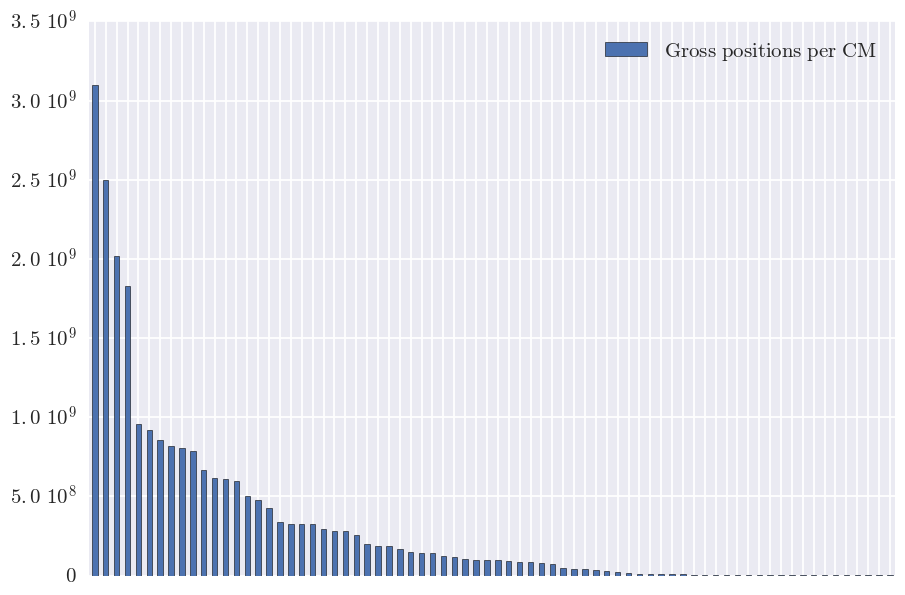

In [10]:
f, ax = plt.subplots()

gross_positions.sort_values()[::-1].plot.bar(ax=ax)

labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

ax.yaxis.set_major_formatter(f_scientific_tex_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

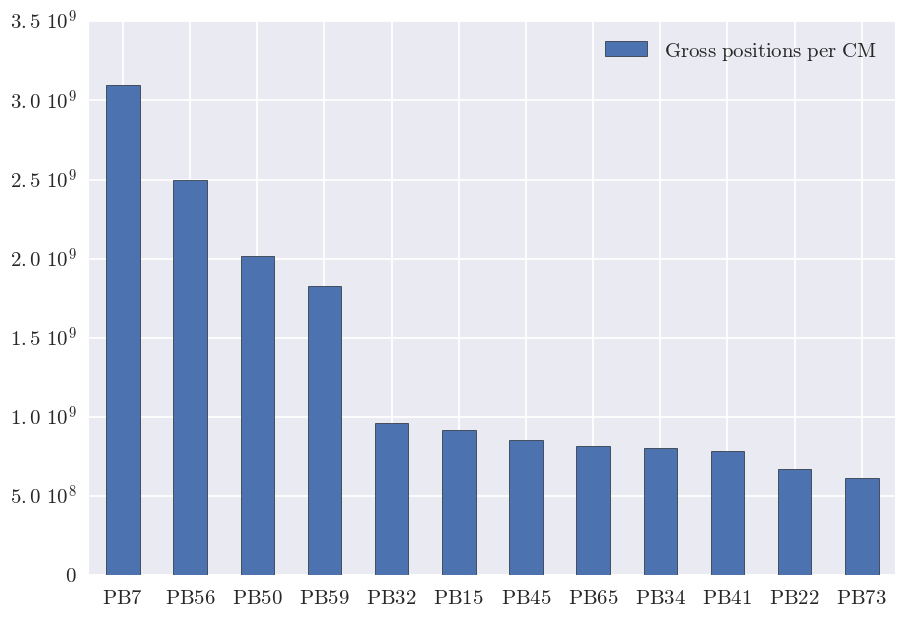

In [11]:
f, ax = plt.subplots()

gross_positions.sort_values()[::-1][:12].plot.bar(ax=ax)

labels = [tex_transf(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

for label in ax.get_xticklabels():
    label.set_rotation(0) 

ax.yaxis.set_major_formatter(f_scientific_tex_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

# Gross positions per underlying

In [12]:
gross_positions_aggreg = abs_positions.sum(axis=0)
gross_positions_udl = gross_positions_aggreg.multiply(udl_values)

gross_positions_udl.name = r'$\rm{Gross \,\, positions \,\, per \,\, underlying}$'

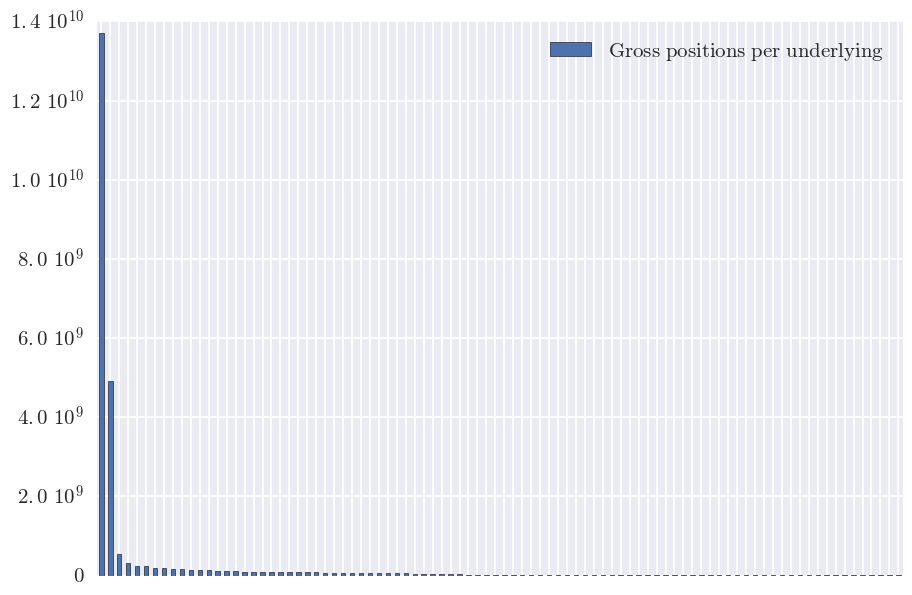

In [13]:
f, ax = plt.subplots()

gross_positions_udl.sort_values()[::-1].plot.bar(ax=ax)

labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

ax.yaxis.set_major_formatter(f_scientific_tex_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

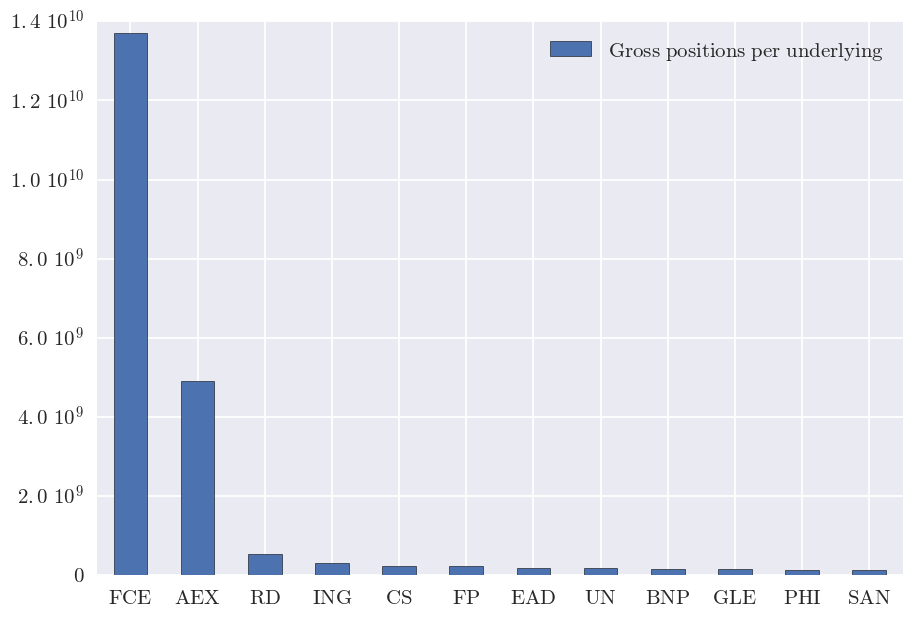

In [14]:
f, ax = plt.subplots()

gross_positions_udl.sort_values()[::-1][:12].plot.bar(ax=ax)

labels = [tex_transf(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

for label in ax.get_xticklabels():
    label.set_rotation(0) 

ax.yaxis.set_major_formatter(f_scientific_tex_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

# Highest Gross positions cross highest traded underlyings

In [15]:
filtered_nb = 10

In [16]:
highest_cm = gross_positions.sort_values()[::-1][:filtered_nb]
highest_cm_pos = members_pos.ix[highest_cm.index]

highest_cm_udls = highest_cm_pos.multiply(udl_values)

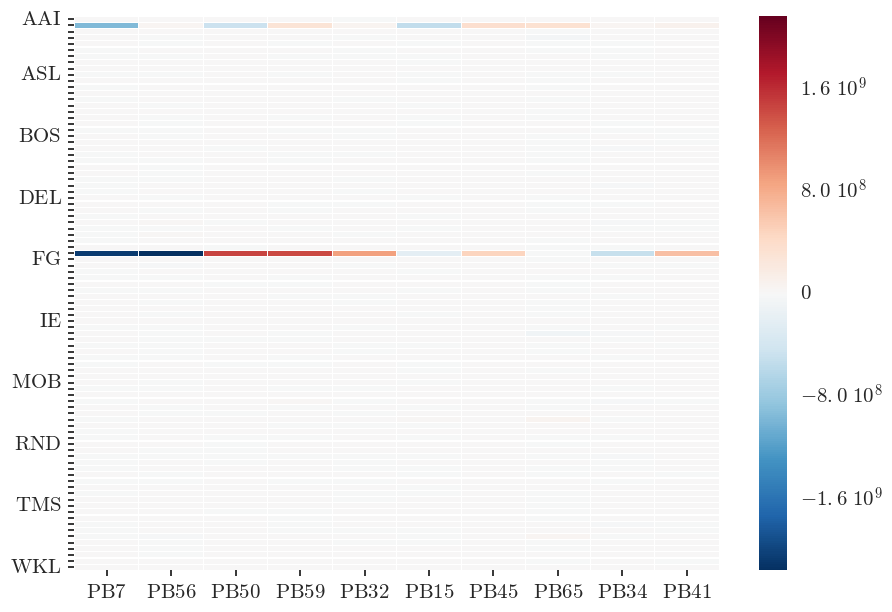

In [17]:
def label_chooser(index):
    if index == 0:
        return True
    
    if (i + 1) % 10 == 0:
        return True
    
    return False

y_labels = [tex_transf(lab) if label_chooser(i) else '' for i, lab in enumerate(highest_cm_pos.columns)]

f, ax = plt.subplots()

sns.heatmap(highest_cm_udls.T, ax=ax, linewidths=.1, 
            cbar_kws={'format': f_scientific_tex_formatter})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelsize)

x_labels = [tex_transf(lab) for lab in highest_cm_pos.index.tolist()]

ax.set_xticklabels(x_labels)
ax.xaxis.set_tick_params(length=4)
ax.xaxis.set_ticks_position('bottom')
for label in ax.get_xticklabels():
    label.set_rotation(0)

ax.yaxis.set_tick_params(length=4)
ax.set_yticklabels(y_labels[::-1])

plt.tick_params(axis='both', which='major', labelsize=labelsize)

plt.show()

In [18]:
filtered_nb = 3

In [19]:
highest_udls = gross_positions_udl.sort_values()[::-1][:filtered_nb]
highest_udl_pos = members_pos[highest_udls.index]

highest_udl_vals = highest_udl_pos.multiply(udl_values[highest_udls.index])

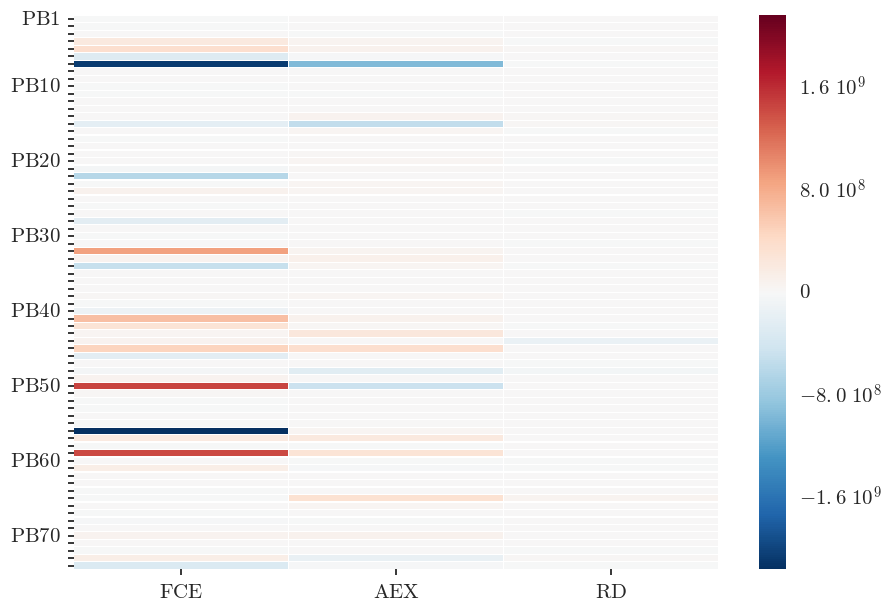

In [20]:
def label_chooser(index):
    if index == 0:
        return True
    
    if (i + 1) % 10 == 0:
        return True
    
    return False

y_labels = [tex_transf(lab) if label_chooser(i) else '' for i, lab in enumerate(highest_udl_vals.index.tolist())]

f, ax = plt.subplots()

sns.heatmap(highest_udl_vals, ax=ax, linewidths=.1, 
            cbar_kws={'format': f_scientific_tex_formatter})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelsize)

x_labels = [tex_transf(lab) for lab in highest_udl_vals.columns]

ax.set_xticklabels(x_labels)
ax.xaxis.set_tick_params(length=4)
ax.xaxis.set_ticks_position('bottom')
for label in ax.get_xticklabels():
    label.set_rotation(0)

ax.yaxis.set_tick_params(length=4)
ax.set_yticklabels(y_labels[::-1])

plt.tick_params(axis='both', which='major', labelsize=labelsize)

plt.show()